In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
clean_q = pd.read_csv('cleaned_q.csv')

In [10]:
clean_q=clean_q.rename(columns={'Unnamed: 0':'date_q'})

In [11]:
clean_q=clean_q.set_index(clean_q['date_q'])

In [12]:
clean_q

,date_q,_date_,snl_4q,snl_sa,sales,sales_sa,avg_price,avg_price_sa,nlist,nlist_sa,mls_hpi_comp,mls_hpi_apt,mls_hpi_sfd,mls_hpi_2sto,mls_hpi_1sto,mls_hpi_row,sales_newlist
date_q,,,,,,,,,,,,,,,,,
1980Q1,1980Q1,1980-01-01,0.00,NaN,2886.0,NaN,88573.0,NaN,4963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581503
1980Q2,1980Q2,1980-04-01,0.00,NaN,2590.0,NaN,94050.0,NaN,5462.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.474185
1980Q3,1980Q3,1980-07-01,0.00,NaN,3298.0,NaN,96884.0,NaN,5386.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.612328
1980Q4,1980Q4,1980-10-01,58.75,NaN,2825.0,NaN,96039.0,NaN,3933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.718281
1981Q1,1981Q1,1981-01-01,57.83,NaN,3296.0,NaN,104432.0,NaN,5984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.550802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019Q4,2019Q4,2019-10-01,51.65,50.68,4436.0,5385.0,448153.0,451738.0,6989.0,10625.0,414329.0,251330.0,463045.0,496581.0,434027.0,288636.0,0.634712
2020Q1,2020Q1,2020-01-01,52.82,51.39,4234.0,5033.0,449322.0,454474.0,9798.0,9794.0,411379.0,245784.0,460555.0,493769.0,431567.0,288356.0,0.432129
2020Q2,2020Q2,2020-04-01,51.81,54.87,4657.0,3564.0,446318.0,438816.0,9656.0,6495.0,408224.0,242954.0,458295.0,492316.0,427886.0,281715.0,0.482291


<AxesSubplot:xlabel='date_q'>

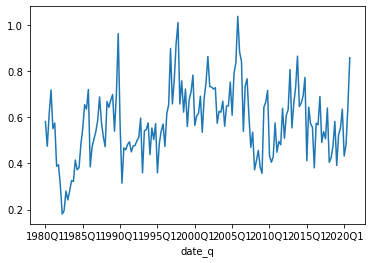

In [13]:
clean_q['sales_newlist'].plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

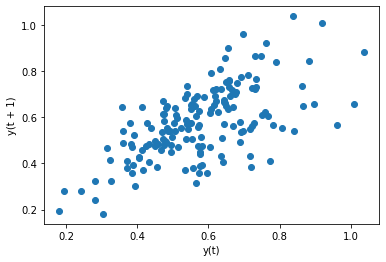

In [14]:
pd.plotting.lag_plot(clean_q['sales_newlist'])

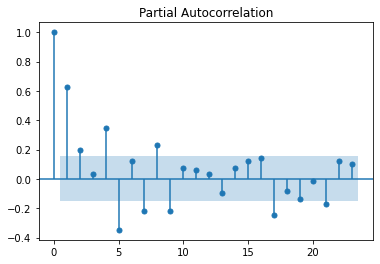

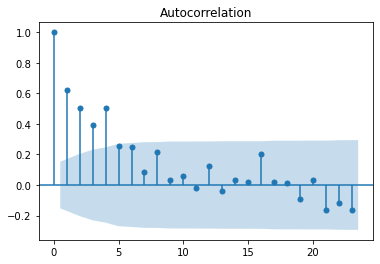

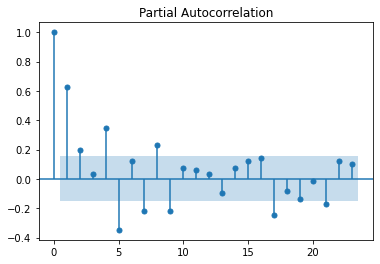

In [107]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(clean_q['sales_newlist'])
plot_pacf(clean_q['sales_newlist'])

# Naive Model

In [63]:
from sklearn.metrics import mean_squared_error
snl = clean_q['sales_newlist']
val = pd.DataFrame(snl.values)
df = pd.concat([val.shift(1),val],axis=1)
df.columns=['t-1','t+1']


In [19]:
x = df.values
train, test = x[1:len(x)-8],x[len(x)-8:]
train_x, train_y = train[:,0], train[:,1]
test_x,test_y = test[:,0], test[:,1]


In [26]:
def naive_model(x):
    return x


Test MSE: 0.022


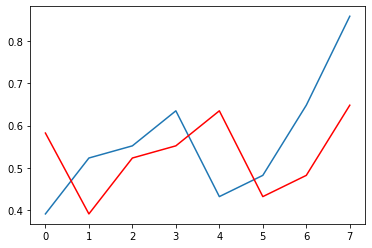

In [30]:
predictions = list()
for x in test_x:
    yhat = naive_model(x)
    predictions.append(yhat)
score = mean_squared_error(test_y,predictions)
print('Test MSE: %.3f'% score )
plt.plot(test_y)
plt.plot(predictions,color='red')
plt.show()

In [31]:
df.corr()

,t-1,t+1
t-1,1.000000,0.627411
t+1,0.627411,1.000000


In [53]:
from statsmodels.tsa.ar_model import AutoReg
x=snl.values

train, test = x[1:len(x)-12],x[len(x)-12:]

model = AutoReg(train,lags=8)
model_fit=model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False)


Coefficients: [ 0.12946771  0.70805397 -0.12589506  0.11829517  0.36348277 -0.4044739
  0.28577281 -0.38069574  0.21659006]


predicted=0.508108, expected=0.404835
predicted=0.571030, expected=0.423928
predicted=0.512717, expected=0.475104
predicted=0.624703, expected=0.582233
predicted=0.546909, expected=0.391254
predicted=0.607230, expected=0.523259
predicted=0.531159, expected=0.552020
predicted=0.621882, expected=0.634712
predicted=0.560055, expected=0.432129
predicted=0.617079, expected=0.482291
predicted=0.546428, expected=0.647970
predicted=0.616765, expected=0.858065
Test RMSE: 0.119


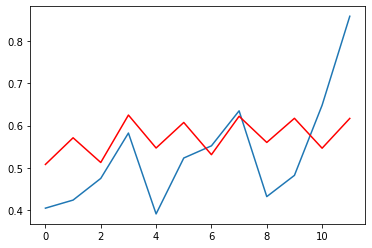

In [54]:
import math
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' %(predictions[i],test[i]))

rmse = math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(predictions,color='red')
plt.show()

predicted=0.129468, expected=0.404835
predicted=0.302932, expected=0.423928
predicted=0.370559, expected=0.475104
predicted=0.513007, expected=0.582233
predicted=0.316376, expected=0.391254
predicted=0.496947, expected=0.523259
predicted=0.417443, expected=0.552020
predicted=0.612410, expected=0.634712
predicted=0.495431, expected=0.432129
predicted=0.576353, expected=0.482291
predicted=0.473732, expected=0.647970
predicted=0.637382, expected=0.858065
Test RMSE: 0.136


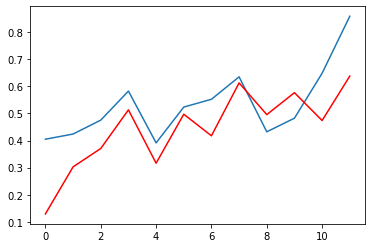

In [51]:
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' %(predictions[i],test[i]))

rmse = math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test)
plt.plot(predictions,color='red')
plt.show()

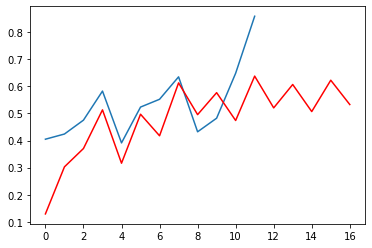

In [70]:
predictions = model_fit.predict(start=len(train),end=len(train)+len(test)+4,dynamic=True)
plt.plot(test)
plt.plot(predictions,color='red')
plt.show()

## Stationarity Test

In [57]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print('Results of Dickey-Fuller')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statistic', 'p-val', '# lags', 'N'])
    for key, val in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = val
    print(dfoutput)

In [58]:
adf_test(snl)

Results of Dickey-Fuller
Test statistic           -3.594303
p-val                     0.005871
# lags                    8.000000
N                       155.000000
Critical Value (1%)      -3.473259
Critical Value (5%)      -2.880374
Critical Value (10%)     -2.576812
dtype: float64


In [68]:
adf_test(snl.diff(1).dropna())

Results of Dickey-Fuller
Test statistic         -5.792103e+00
p-val                   4.845452e-07
# lags                  1.400000e+01
N                       1.480000e+02
Critical Value (1%)    -3.475325e+00
Critical Value (5%)    -2.881275e+00
Critical Value (10%)   -2.577293e+00
dtype: float64


## ARIMA

In [119]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(snl,order=(8,0,0))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:          sales_newlist   No. Observations:                  164
Model:                 ARIMA(8, 0, 0)   Log Likelihood                 145.840
Date:                Sun, 14 Feb 2021   AIC                           -271.680
Time:                        01:38:41   BIC                           -240.681
Sa

In [120]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(snl,order=(8,0,5))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:          sales_newlist   No. Observations:                  164
Model:                 ARIMA(8, 0, 5)   Log Likelihood                 149.775
Date:                Sun, 14 Feb 2021   AIC                           -269.549
Time:                        01:41:19   BIC                           -223.051
Sa

In [121]:
model = ARIMA(snl,order=(7,0,0))
model_fit = model.fit()

print(model_fit.summary())

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:          sales_newlist   No. Observations:                  164
Model:                 ARIMA(7, 0, 0)   Log Likelihood                 141.882
Date:                Sun, 14 Feb 2021   AIC                           -265.764
Time:                        01:41:36   BIC                           -237.865
Sa

<AxesSubplot:xlabel='date_q'>

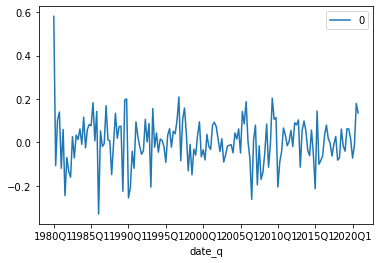

In [72]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

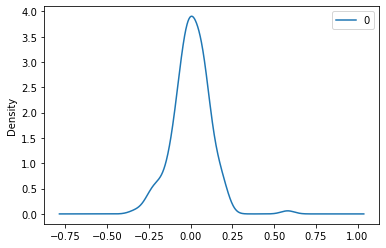

In [73]:
residuals.plot(kind='kde')

In [109]:
val = snl.values
size = int(len(val)*0.80)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(8,0,5))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=0.695315, expected=0.806651
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=0.674077, expected=0.554035
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=0.606423, expected=0.658971
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=0.620912, expected=0.730107
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelih

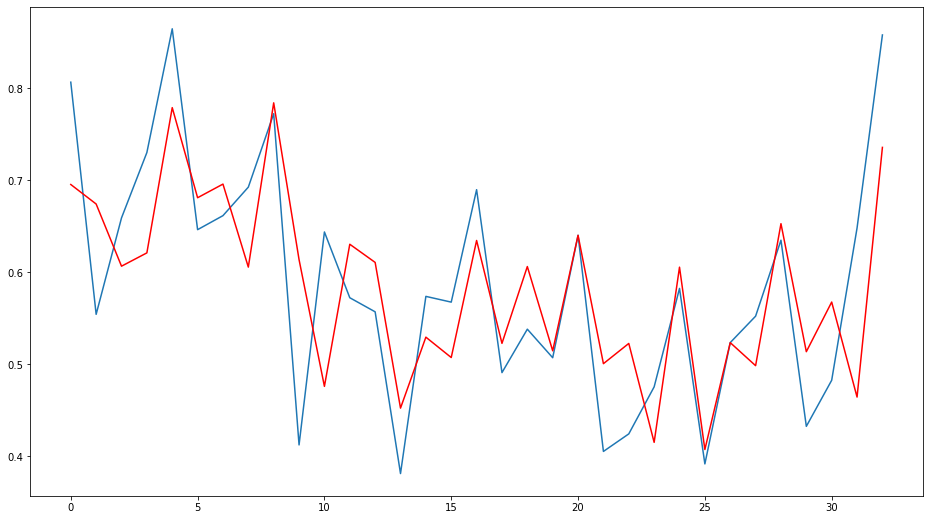

In [110]:
plt.figure(figsize=(16,9))
plt.plot(test)
plt.plot(predictions,color='red')


In [111]:
predictions.extend(list(model_fit.forecast(4)))

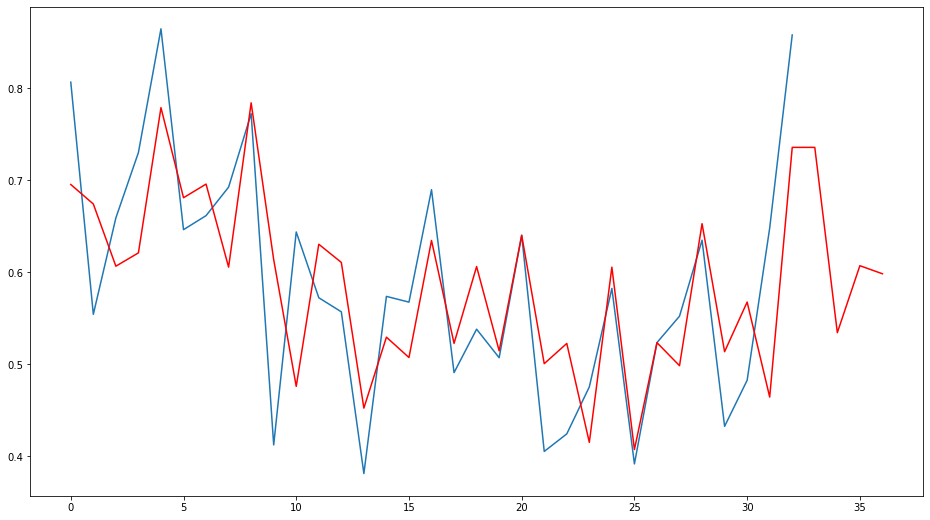

In [112]:
plt.figure(figsize=(16,9))
plt.plot(test)
plt.plot(predictions,color='red')

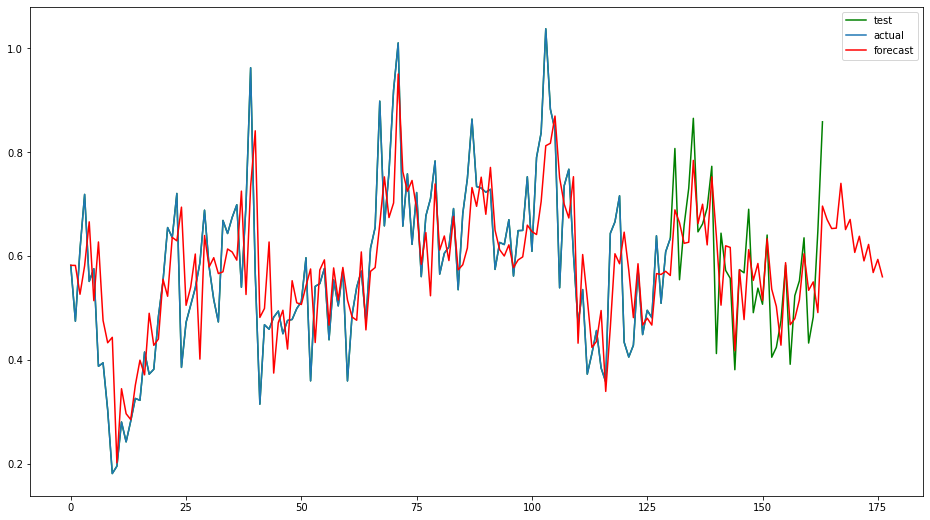

In [168]:
plt.figure(figsize=(16,9))
plt.plot(snl.values,color='green')
plt.plot(train)
plt.plot(model_fit.predict(starts ='2020-01',end ='2024',dynamic=False).values,color='red')
plt.legend(['test','actual','forecast'])


In [177]:
snl.index = pd.date_range(start = '1980',end = '2021', freq='q')


In [183]:
val = snl.values
size = int(len(val)*0.80)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history,order=(8,0,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat,obs))
rmse=math.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)

predicted=0.685221, expected=0.806651
predicted=0.678658, expected=0.554035
predicted=0.609935, expected=0.658971
predicted=0.602318, expected=0.730107
predicted=0.777467, expected=0.864745
predicted=0.678797, expected=0.646167
predicted=0.696653, expected=0.661419
predicted=0.596737, expected=0.692453
predicted=0.780072, expected=0.772356
predicted=0.640454, expected=0.411923
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=0.486008, expected=0.643665
predicted=0.618149, expected=0.572092
predicted=0.629159, expected=0.556759
predicted=0.457300, expected=0.380758
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
predicted=0.560609, expected=0.573564
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\m

In [211]:
f_cast = model_fit.get_forecast(12,alpha = 0.25)
fcast_res = f_cast.summary_frame()

In [212]:
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')

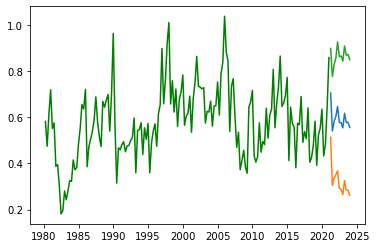

In [218]:
plt.plot(snl,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])

In [244]:
val = snl.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()
model = ARIMA(history,order=(8,0,0))
model_fit=model.fit()
output=model_fit.get_forecast(len(test))
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)

RMSE: 0.111


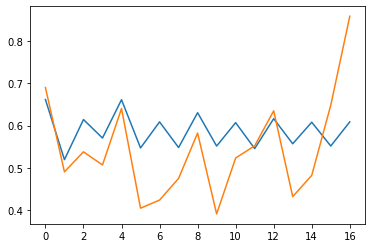

In [241]:
plt.plot(output.summary_frame()['mean'])
plt.plot(test)

RMSE: 0.110
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


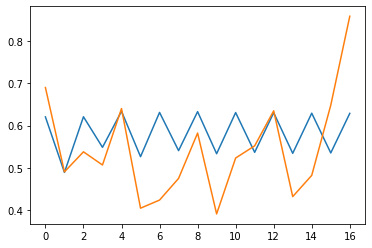

In [250]:
val = snl.values
size = int(len(val)*0.90)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()
model = ARIMA(history,order=(7,0,5))
model_fit=model.fit()
output=model_fit.get_forecast(len(test))
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'])
plt.plot(test)

## SARIMAX

In [252]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

RMSE: 0.093
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


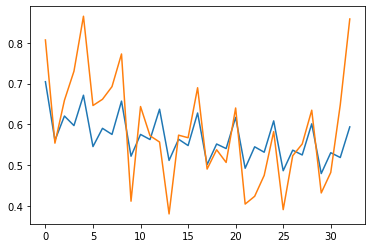

In [317]:
val = snl.values
size = int(len(val)*0.80)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
predictions = list()
model = SARIMAX(history,order=(3,0,2), seasonal_order=(1,0,1,4))
model_fit=model.fit()
output=model_fit.get_forecast(len(test))
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'])
plt.plot(test)

In [318]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  131
Model:             SARIMAX(3, 0, 2)x(1, 0, [1], 4)   Log Likelihood                 111.817
Date:                             Sun, 14 Feb 2021   AIC                           -207.634
Time:                                     20:37:59   BIC                           -184.633
Sample:                                          0   HQIC                          -198.288
                                             - 131                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1872      0.221     -0.845      0.398      -0.621       0.247
ar.L2          0.1577      0.143      1.102      0.270      -0.123       0.438
ar.L3          0.7134      0.173      4.135      0.000       0.375       1.052
ma.L1          1.1004      0.228      4.820      0.000       0.653       1.548
ma.L2          0.7055      0.217      3.251      0.001       0.280       1.131
ar.S.L4        0.9896      0.020     48.714      0.000       0.950       1.029
ma.S.L4       -0.8666      0.093     -9.335      0.000      -1.049      -0.685
sigma2         0.0099      0.001      7.087      0.000       0.007       0.013
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                11.36
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               0.62   Skew:                            -0.61
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

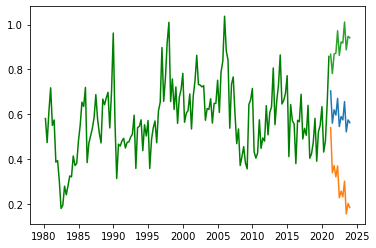

In [320]:
f_cast = model_fit.get_forecast(12)
fcast_res = f_cast.summary_frame(alpha = 0.1)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')
plt.plot(snl,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']])

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


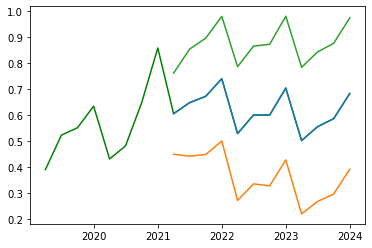

In [321]:

model = SARIMAX(val,order=(3,0,2), seasonal_order=(1,0,1,4))
model_fit=model.fit()
f_cast = model_fit.get_forecast(12)
fcast_res = f_cast.summary_frame(alpha = 0.1)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')
history = snl['2019':]
history=history.append(fcast_res['mean'])
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':])

In [324]:
prov_fcast = pd.read_csv('prov_forecasts.csv')
nat_fcast = pd.read_csv('nat_forecast.csv')

In [328]:
prov_fcast=prov_fcast.set_index('Unnamed: 0')
nat_fcast=nat_fcast.set_index('date')

In [329]:
prov_fcast

,Alberta_Real GDP,Alberta_Real household disp. income,Alberta_CPI,Alberta_Unemployment rate,Alberta_Number of households,Alberta_Share of population aged 25-34,Alberta_Real 5-year mortgage rate
Unnamed: 0,,,,,,,
1984Q1,123554.787000,43487.392479,0.593435,10.900000,8.036833e+05,0.202737,9.197292
1984Q2,126137.482000,44638.104602,0.595181,11.600000,8.052995e+05,0.202876,12.055714
1984Q3,125411.117000,44106.463796,0.600481,11.733333,8.067957e+05,0.202639,11.631155
1984Q4,129204.614000,44773.150681,0.603223,11.400000,8.083714e+05,0.203535,10.734994
1985Q1,135372.716000,46578.003995,0.608993,10.466667,8.102094e+05,0.204120,10.332823
...,...,...,...,...,...,...,...
2023Q4,363862.101939,131206.810400,1.415650,9.347530,1.785216e+06,0.145693,-1.464258
2024Q1,369741.211128,132074.703219,1.424879,9.083781,1.794615e+06,0.145249,-1.745479
2024Q2,375038.059258,133023.757237,1.433453,8.898994,1.803920e+06,0.144720,-1.286832


In [330]:
nat_exog = nat_fcast[['Interest rate on fixed 5-year mortgages [%]','World Price Oil (West Texas Intermediate)']]

In [333]:
nat_exog=nat_exog.rename(columns={
    'Interest rate on fixed 5-year mortgages [%]':'morg_rate',
    'World Price Oil (West Texas Intermediate)':'wti'
})

In [335]:
nat_exog=nat_exog[:'2024']

In [336]:
comm_fcast =pd.read_csv('comm_fore.csv')

In [349]:
nat_exog.wti[164:] = comm_fcast[116:].WTI

In [354]:
nat_exog

,morg_rate,wti
date,,
1980 Q1,13.816670,35.833330
1980 Q2,14.616670,39.500000
1980 Q3,13.676670,37.833330
1980 Q4,15.156670,36.333330
1981 Q1,15.396670,38.000000
...,...,...
2022 Q4,3.643348,53.199447
2023 Q1,3.703923,56.015266
2023 Q2,3.769940,57.525450


In [355]:
prov_exog = prov_fcast[['Alberta_Unemployment rate','Alberta_Number of households']]

In [ ]:
exog_diff = nat_exog.diff(1)
exog_diff=exog_diff.dropna()

RMSE: 0.095
C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


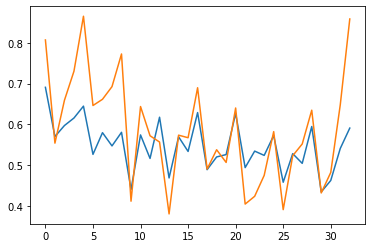

In [388]:
val = snl[1:].values
size = int(len(val)*0.80)
train, test = val[0:size], val[size:len(val)]
history=[x for x in train]
exog = exog_diff[['wti','morg_rate']][:163].values
exog_train, exog_test = exog[0:size], exog[size:len(exog)]
predictions = list()
model = SARIMAX(history,order=(3,0,2), seasonal_order=(1,0,1,4),exog=exog_train)
model_fit=model.fit()
output=model_fit.get_forecast(len(test), exog=exog_test)
rmse=math.sqrt(mean_squared_error(test,output.summary_frame()['mean']))
print('RMSE: %.3f' % rmse)
plt.plot(output.summary_frame()['mean'])
plt.plot(test)

In [389]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  130
Model:             SARIMAX(3, 0, 2)x(1, 0, [1], 4)   Log Likelihood                 113.198
Date:                             Mon, 15 Feb 2021   AIC                           -206.397
Time:                                     09:29:36   BIC                           -177.721
Sample:                                          0   HQIC                          -194.745
                                             - 130                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0026      0.001      2.207      0.027       0.000       0.005
x2            -0.0017      0.013     -0.134      0.893      -0.027       0.023
ar.L1          0.2879      1.201      0.240      0.811      -2.067       2.643
ar.L2          0.1251      0.757      0.165      0.869      -1.359       1.609
ar.L3          0.2911      0.779      0.374      0.709      -1.236       1.818
ma.L1          0.5670      1.238      0.458      0.647      -1.860       2.994
ma.L2          0.2492      0.989      0.252      0.801      -1.689       2.188
ar.S.L4        0.9886      0.020     49.781      0.000       0.950       1.028
ma.S.L4       -0.8504      0.114     -7.468      0.000      -1.074      -0.627
sigma2         0.0097      0.001      7.286      0.000       0.007       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 5.90
Prob(Q):                              0.79   Prob(JB):                         0.05
Heteroskedasticity (H):               0.58   Skew:                            -0.45
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

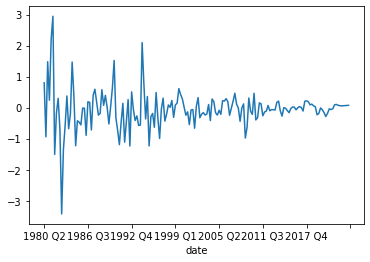

In [381]:
exog_diff['morg_rate'].plot()

In [392]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'mean error':me, 'mae': mae, 
            'mean percentage error': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

In [393]:
forecast_accuracy(output.summary_frame()['mean'],test)

{'mape': 0.11398862234789008,
 'mean error': -0.038211476975126134,
 'mae': 0.07070293628786396,
 'mean percentage error': -0.03835756266405157,
 'rmse': 0.09504542738962499,
 'corr': 0.8120161781419479,
 'minmax': 0.10824421642996085}

In [382]:
exog_diff['morg_rate'][:164]

date
1980 Q2    0.800000
1980 Q3   -0.940000
1980 Q4    1.480000
1981 Q1    0.240000
1981 Q2    2.210000
             ...   
2020 Q1   -0.066667
2020 Q2   -0.160000
2020 Q3   -0.286667
2020 Q4   -0.183333
2021 Q1   -0.038506
Name: morg_rate, Length: 164, dtype: float64

C:\Users\Maln\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


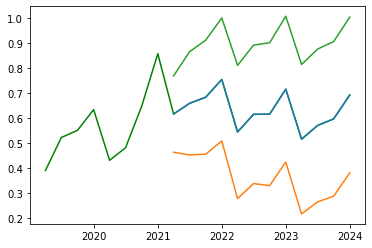

In [401]:

exog = exog_diff['morg_rate'][:163].values
exog_fcast = exog_diff['morg_rate'][163:175]

model = SARIMAX(val,order=(3,0,2), seasonal_order=(1,0,1,4),exog=exog)
model_fit=model.fit()
f_cast = model_fit.get_forecast(12,exog=exog_fcast)
fcast_res = f_cast.summary_frame(alpha = 0.1)
fcast_res.index= pd.date_range(start='2021',periods=12,freq='q')
history = snl['2019':]
history=history.append(fcast_res['mean'])
plt.plot(history,color='green')

plt.plot(fcast_res[['mean','mean_ci_lower','mean_ci_upper']]['2019':])

In [406]:
output=snl.append(fcast_res['mean'])

In [407]:
output.to_csv('snl_fcast.csv')